In [1656]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [1657]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [1658]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [1659]:
df.shape

(202, 26)

In [1660]:
num_column = df.select_dtypes(include=['int64', 'float64']).columns
num_column

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [1661]:
object_column = df.select_dtypes(include=['object']).columns
object_column

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm'],
      dtype='object')

In [1662]:
col_obj_to_num = []

for index, column in enumerate(object_column):
    is_numeric = df[column].str.match(r'^-?\d+(\.\d+)?$')
    num_count = is_numeric.sum()
    text_count = len(df[column]) - num_count

    percent_num = float(((num_count/len(df[column])) * 100))
    percent_text = float(((text_count/len(df[column])) * 100))
    
    if percent_num > 95:
        col_obj_to_num.append(column)

print(col_obj_to_num)

['bore', 'stroke', 'horsepower', 'peak-rpm']


In [1663]:
df[col_obj_to_num]

,bore,stroke,horsepower,peak-rpm
0,3.47,2.68,111,5000
1,3.47,2.68,111,5000
2,2.68,3.47,154,5000
3,3.19,3.4,102,5500
4,3.19,3.4,115,5500
...,...,...,...,...
197,3.78,3.15,160,5300
198,3.58,2.87,134,5500
199,3.01,3.4,106,4800
200,3.78,3.15,114,5400


In [1664]:
for index, column in enumerate(col_obj_to_num):
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [1665]:
df_num_merge = pd.concat([df[num_column], df[col_obj_to_num]], axis=1)
df_num_merge.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,bore,stroke,horsepower,peak-rpm
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,3.47,2.68,111.0,5000.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,3.47,2.68,111.0,5000.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,2.68,3.47,154.0,5000.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,3.19,3.40,102.0,5500.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,3.19,3.40,115.0,5500.0


In [1666]:
df_num_merge.isnull().sum()

symboling             0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
compression-ratio     0
city-mpg              0
highway-mpg           0
price                 0
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [1667]:
for index, col in enumerate(df_num_merge.columns):
        means = df_num_merge[col].mean()
        df_num_merge[col] = df_num_merge[col].fillna(means)
df_num_merge.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,bore,stroke,horsepower,peak-rpm
0,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,3.47,2.68,111.0,5000.0
1,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,3.47,2.68,111.0,5000.0
2,1,121.836364,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,2.68,3.47,154.0,5000.0
3,2,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,3.19,3.40,102.0,5500.0
4,2,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,3.19,3.40,115.0,5500.0


In [1668]:
df_object_column = df.select_dtypes(include=['object'])
df_object_column

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi


In [1669]:
label_encoder = LabelEncoder()
for index, col in enumerate(df_object_column.columns):
    df_object_column[col] = label_encoder.fit_transform(df_object_column[col])

df_object_column


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,0,1,0,1,0,2,0,0,2,5
1,0,1,0,1,0,2,0,0,2,5
2,0,1,0,1,2,2,0,4,3,5
3,1,1,0,0,3,1,0,2,2,5
4,1,1,0,0,3,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...
197,21,1,1,0,3,2,0,2,2,5
198,21,1,0,0,3,2,0,4,3,5
199,21,0,1,0,3,2,0,2,3,3
200,21,1,1,0,3,2,0,2,2,5


In [1670]:
df_merge_tarnsformed = pd.concat([df_num_merge, df_object_column], axis=1)
df_merge_tarnsformed

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,0,1,0,1,0,2,0,0,2,5
1,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,0,1,0,1,0,2,0,0,2,5
2,1,121.836364,94.5,171.2,65.5,52.4,2823,152,9.0,19,...,0,1,0,1,2,2,0,4,3,5
3,2,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,24,...,1,1,0,0,3,1,0,2,2,5
4,2,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,18,...,1,1,0,0,3,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.000000,109.1,188.8,68.8,55.5,3049,141,8.7,19,...,21,1,1,0,3,2,0,2,2,5
198,-1,95.000000,109.1,188.8,68.9,55.5,3012,173,8.8,18,...,21,1,0,0,3,2,0,4,3,5
199,-1,95.000000,109.1,188.8,68.9,55.5,3217,145,23.0,26,...,21,0,1,0,3,2,0,2,3,3
200,-1,95.000000,109.1,188.8,68.9,55.5,3062,141,9.5,19,...,21,1,1,0,3,2,0,2,2,5


In [1671]:
df_merge_tarnsformed['avg_mpg'] = (df['city-mpg']+df['highway-mpg'])/2
df_merge_tarnsformed['power-to-weight'] = df['horsepower'] / df['curb-weight']
df_merge_tarnsformed['fuel-consumption'] =  1 / df_merge_tarnsformed['avg_mpg']
df_merge_tarnsformed['engine-size-per-weight'] = df['engine-size'] / df['curb-weight']
df_merge_tarnsformed['bore-stroke-ratio'] = df['bore'] / df['stroke']
df_merge_tarnsformed['car-area'] = df['length'] * df['width']
df_merge_tarnsformed['car-volume'] = df['length'] * df['width'] * df['height']
df_merge_tarnsformed['weight-per-length'] = df['curb-weight'] / df['length']
df_merge_tarnsformed['hp-per-engine-size'] = df['horsepower'] / df['engine-size']
df_merge_tarnsformed['make_freq'] = df['make'].map(df['make'].value_counts())
df_merge_tarnsformed['body-style_freq'] = df['body-style'].map(df['body-style'].value_counts())


In [1672]:
for index, col in enumerate(df_merge_tarnsformed.columns):
        means = df_merge_tarnsformed[col].mean()
        df_merge_tarnsformed[col] = df_merge_tarnsformed[col].fillna(means)
df_merge_tarnsformed.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,power-to-weight,fuel-consumption,engine-size-per-weight,bore-stroke-ratio,car-area,car-volume,weight-per-length,hp-per-engine-size,make_freq,body-style_freq
0,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,0.043564,0.041667,0.051020,1.294776,10820.08,528019.904,15.094787,0.853846,3,6
1,3,121.836364,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,0.043564,0.041667,0.051020,1.294776,10820.08,528019.904,15.094787,0.853846,3,6
2,1,121.836364,94.5,171.2,65.5,52.4,2823,152,9.0,19,...,0.054552,0.044444,0.053843,0.772334,11213.60,587592.640,16.489486,1.013158,3,68
3,2,164.000000,99.8,176.6,66.2,54.3,2337,109,10.0,24,...,0.043646,0.037037,0.046641,0.938235,11690.92,634816.956,13.233296,0.935780,6,95
4,2,164.000000,99.4,176.6,66.4,54.3,2824,136,8.0,18,...,0.040722,0.050000,0.048159,0.938235,11726.24,636734.832,15.990940,0.845588,6,95


In [1673]:
df_merge_tarnsformed.isnull().sum()

symboling                 0
normalized-losses         0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-size               0
compression-ratio         0
city-mpg                  0
highway-mpg               0
price                     0
bore                      0
stroke                    0
horsepower                0
peak-rpm                  0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
body-style                0
drive-wheels              0
engine-location           0
engine-type               0
num-of-cylinders          0
fuel-system               0
avg_mpg                   0
power-to-weight           0
fuel-consumption          0
engine-size-per-weight    0
bore-stroke-ratio         0
car-area                  0
car-volume                0
weight-per-length         0
hp-per-engine-size        0
make_freq           

In [1674]:
df_merge_tarnsformed.shape

(202, 37)

In [1675]:
correlation_table = df_merge_tarnsformed.select_dtypes(include=['int64', 'float64']).corr()
correlation_table

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,power-to-weight,fuel-consumption,engine-size-per-weight,bore-stroke-ratio,car-area,car-volume,weight-per-length,hp-per-engine-size,make_freq,body-style_freq
symboling,1.000000,4.689180e-01,-0.541598,-0.370773,-0.250262,-0.551691,-0.238419,-0.112429,-0.180012,-0.028289,...,0.300570,0.009003,0.063635,-0.076707,-0.346047,-0.469487,-0.138965,0.294514,-0.120154,-0.207143
normalized-losses,0.468918,1.000000e+00,-0.063653,0.013715,0.079667,-0.375560,0.094119,0.109808,-0.113848,-0.219377,...,0.257417,0.206075,0.091387,-0.073664,0.034032,-0.102891,0.131956,0.231986,-0.149157,0.090422
wheel-base,-0.541598,-6.365282e-02,1.000000,0.876689,0.816586,0.591751,0.782893,0.570654,0.247128,-0.474246,...,-0.058231,0.537930,0.135448,0.182620,0.890019,0.915295,0.654349,-0.128281,-0.111662,0.113913
length,-0.370773,1.371493e-02,0.876689,1.000000,0.858237,0.493897,0.881257,0.684445,0.158193,-0.666999,...,0.165169,0.692488,0.241466,0.271153,0.984269,0.949748,0.751453,0.025909,-0.163511,0.036281
width,-0.250262,7.966682e-02,0.816586,0.858237,1.000000,0.309088,0.866690,0.727941,0.187716,-0.635681,...,0.219123,0.715467,0.320693,0.188596,0.934488,0.847664,0.792045,0.036488,-0.234662,0.043635
height,-0.551691,-3.755604e-01,0.591751,0.493897,0.309088,1.000000,0.309904,0.075776,0.258812,-0.053001,...,-0.352925,0.049206,-0.182171,0.141952,0.451403,0.709743,0.189804,-0.274720,0.013678,-0.018385
curb-weight,-0.238419,9.411908e-02,0.782893,0.881257,0.866690,0.309904,1.000000,0.848463,0.155245,-0.750710,...,0.326718,0.821613,0.389002,0.262183,0.905614,0.822009,0.972096,0.080357,-0.220055,-0.090318
engine-size,-0.112429,1.098084e-01,0.570654,0.684445,0.727941,0.075776,0.848463,1.000000,0.028598,-0.650490,...,0.498363,0.773095,0.807652,0.181194,0.724297,0.592243,0.845317,-0.067183,-0.216634,-0.080114
compression-ratio,-0.180012,-1.138477e-01,0.247128,0.158193,0.187716,0.258812,0.155245,0.028598,1.000000,0.331434,...,-0.437863,-0.264854,-0.113979,-0.145245,0.173809,0.232430,0.133474,-0.405803,0.039902,0.088770
city-mpg,-0.028289,-2.193771e-01,-0.474246,-0.666999,-0.635681,-0.053001,-0.750710,-0.650490,0.331434,1.000000,...,-0.641260,-0.938858,-0.318608,-0.328802,-0.673168,-0.544989,-0.749236,-0.504235,0.251107,0.113566


In [1676]:
price_correlation = correlation_table['price'].sort_values(ascending=False)
price_correlation

price                     1.000000
engine-size               0.871051
curb-weight               0.835277
weight-per-length         0.823421
horsepower                0.808366
fuel-consumption          0.803595
width                     0.753236
car-area                  0.739906
length                    0.692774
car-volume                0.631481
drive-wheels              0.591249
engine-size-per-weight    0.588900
wheel-base                0.588382
bore                      0.547298
fuel-system               0.523984
power-to-weight           0.509506
engine-location           0.329178
bore-stroke-ratio         0.256560
aspiration                0.189366
height                    0.139003
hp-per-engine-size        0.131349
normalized-losses         0.127440
engine-type               0.125031
stroke                    0.079972
compression-ratio         0.069881
num-of-cylinders          0.004485
num-of-doors             -0.062527
body-style               -0.070042
body-style_freq     

In [1677]:
high_corr_feature = []
target = 'price'

for col in df_merge_tarnsformed.columns:
    if is_numeric_dtype(df_merge_tarnsformed[col]):
            if col != target:
                high_corr_val = df_merge_tarnsformed[target].corr(df_merge_tarnsformed[col])
                if abs(high_corr_val) >= 0.5 and abs(high_corr_val) <= 1:
                    high_corr_feature.append(col)
print(high_corr_feature)

['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg', 'bore', 'horsepower', 'drive-wheels', 'fuel-system', 'avg_mpg', 'power-to-weight', 'fuel-consumption', 'engine-size-per-weight', 'car-area', 'car-volume', 'weight-per-length']


Text(0.5, 1.0, 'Highly correlated features with Price')

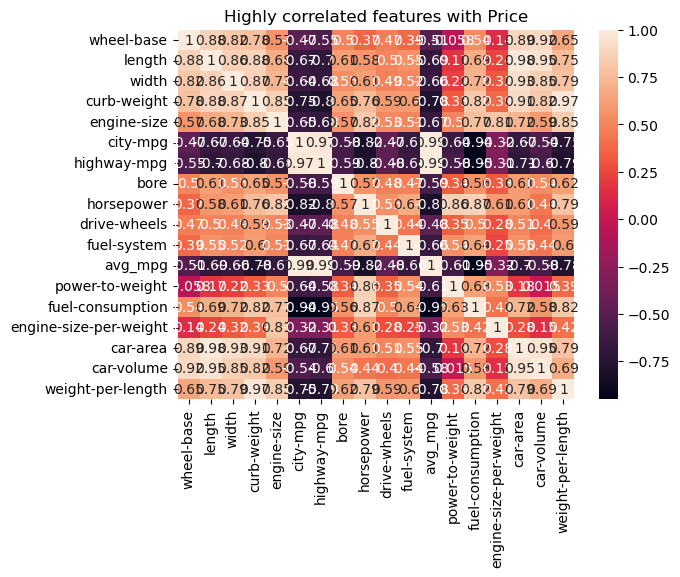

In [1678]:
# Correlation heatmap with respect to Price
sns.heatmap(df_merge_tarnsformed[high_corr_feature].corr(), annot=True)
plt.title('Highly correlated features with Price')

In [1679]:
nums = df_merge_tarnsformed.select_dtypes(include=['int64', 'float64']).dropna()

accepted_vif_column = []
medium_vif_column = []

accepted_vif_val = []
medium_vif_val = []

dummy_x = add_constant(nums)
dummy_x.values

print(f'shape of dummy_x with constant column (Intercept) : {dummy_x.shape[1]}')

for i in range(dummy_x.shape[1]):
    col_name = dummy_x.columns[i]
    vifs = variance_inflation_factor(dummy_x.values, i)
    if vifs >= 1 and vifs <= 3:
        if col_name != 'price':
            accepted_vif_column.append(col_name)
            accepted_vif_val.append(int(vifs))
            # print(f'{col_name} : {vifs}')
    if vifs > 5.0 and vifs <= 10.0:
        if col_name != 'price':
            medium_vif_column.append(col_name)
            medium_vif_val.append(float(vifs))
        
print(accepted_vif_column)
print(accepted_vif_val)
print(medium_vif_column)
print(medium_vif_val)

shape of dummy_x with constant column (Intercept) : 38
['normalized-losses', 'make', 'num-of-doors', 'engine-type', 'make_freq', 'body-style_freq']
[2, 2, 2, 2, 2, 1]
[]
[]


d:\Software\Development_Tools\Anaconda\New folder\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [1680]:
X = df_merge_tarnsformed[high_corr_feature]
Y = df.price

print(f'X shape : {X.shape}')

X shape : (202, 18)


In [1681]:
X.head()

,wheel-base,length,width,curb-weight,engine-size,city-mpg,highway-mpg,bore,horsepower,drive-wheels,fuel-system,avg_mpg,power-to-weight,fuel-consumption,engine-size-per-weight,car-area,car-volume,weight-per-length
0,88.6,168.8,64.1,2548,130,21,27,3.47,111.0,2,5,24.0,0.043564,0.041667,0.051020,10820.08,528019.904,15.094787
1,88.6,168.8,64.1,2548,130,21,27,3.47,111.0,2,5,24.0,0.043564,0.041667,0.051020,10820.08,528019.904,15.094787
2,94.5,171.2,65.5,2823,152,19,26,2.68,154.0,2,5,22.5,0.054552,0.044444,0.053843,11213.60,587592.640,16.489486
3,99.8,176.6,66.2,2337,109,24,30,3.19,102.0,1,5,27.0,0.043646,0.037037,0.046641,11690.92,634816.956,13.233296
4,99.4,176.6,66.4,2824,136,18,22,3.19,115.0,0,5,20.0,0.040722,0.050000,0.048159,11726.24,636734.832,15.990940


In [1682]:
xTrain, xTest, yTrain, yTest = train_test_split(
    X, Y, test_size=0.30, random_state=0
)

print(f'xTrain shape : {xTrain.shape}')
print(f'xTrain shape : {xTest.shape}')

xTrain shape : (141, 18)
xTrain shape : (61, 18)


In [1683]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
xTrain_poly = poly_feature.fit_transform(xTrain)
xTest_poly = poly_feature.transform(xTest)

In [1684]:
linear_reg_model = LinearRegression()

In [1685]:
training_for_lr = linear_reg_model.fit(xTrain_poly, yTrain)
training_for_lr

LinearRegression()

In [1686]:
test_for_lr = linear_reg_model.fit(xTest_poly, yTest)
test_for_lr

LinearRegression()

In [1687]:
score_training_lr = linear_reg_model.score(xTrain_poly, yTrain)
score_training_lr

-1.6391262369763964

In [1688]:
score_test_lr = linear_reg_model.score(xTest_poly, yTest)
score_test_lr

0.9987507638306916

In [1689]:
lasso_model = Lasso()

In [1690]:
training_for_lasso = lasso_model.fit(xTrain, yTrain)
training_for_lasso

d:\Software\Development_Tools\Anaconda\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.405e+08, tolerance: 7.334e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [1691]:
testing_for_lasso = lasso_model.fit(xTest, yTest)
testing_for_lasso

d:\Software\Development_Tools\Anaconda\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+08, tolerance: 5.259e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [1692]:
score_training_lasso = lasso_model.score(xTrain, yTrain)
score_training_lasso

0.6842624995002837

In [1693]:
score_testing_lasso = lasso_model.score(xTest, yTest)
score_testing_lasso

0.9208021481022206

In [1694]:
ridge_model = Ridge(alpha=1.0)

In [1695]:
training_for_ridge = ridge_model.fit(xTrain_poly, yTrain)
training_for_ridge

d:\Software\Development_Tools\Anaconda\New folder\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge()

In [1696]:
testing_for_ridge = ridge_model.fit(xTest_poly, yTest)
testing_for_ridge

d:\Software\Development_Tools\Anaconda\New folder\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge()

In [1697]:
score_training_ridge = ridge_model.score(xTrain_poly, yTrain)
score_training_ridge

0.6849589760512286

In [1698]:
score_testing_ridge = ridge_model.score(xTest_poly, yTest)
score_testing_ridge

0.9388931398028044

In [1699]:
print(xTrain.shape, xTest.shape)
print("Train mean:", xTrain.mean(), "Test mean:", xTest.mean())


(141, 18) (61, 18)
Train mean: wheel-base                    98.780851
length                       174.132624
width                         65.836879
curb-weight                 2543.680851
engine-size                  125.361702
city-mpg                      25.191489
highway-mpg                   30.709220
bore                           3.339070
horsepower                   103.233333
drive-wheels                   1.361702
fuel-system                    3.212766
avg_mpg                       27.950355
power-to-weight                0.039947
fuel-consumption               0.037691
engine-size-per-weight         0.048769
car-area                   11485.357163
car-volume                617861.902504
weight-per-length             14.500948
dtype: float64 Test mean: wheel-base                    99.003279
length                       174.598361
width                         66.059016
curb-weight                 2591.672131
engine-size                  130.606557
city-mpg               